__[Medium Article Link](https://medium.com/@handikaekiw/unlocking-the-potential-of-pycaret-a-low-code-machine-learning-library-c92dd0570167)__

# Article 3 - Handika Eki Winata

## Pycaret Low-code Machine Learning

In [1]:
# You can install PyCaret using the following command:

%pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 52.5 MB/s et

In [2]:
# Library

import pandas as pd
from pycaret.classification import *
import seaborn as sns

In [3]:
# Load your dataset into a pandas DataFrame. For this example, we’ll use a dataset named “Telco Customer Churn”

url = 'https://raw.githubusercontent.com/ekiwinataa/Capstone3_TelcoChurnAnalysis_ML/main/telco_customer_churn.csv'
df = pd.read_csv(url)
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [4]:
# Simplyfy the unique values

df[['OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport']] = df[['OnlineSecurity', 'OnlineBackup',
                                              'DeviceProtection', 'TechSupport']].replace(
                                                  {'No internet service' : 'No'})

In [5]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,2,"[No, Yes]"
3,OnlineBackup,2,"[No, Yes]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,2,"[Yes, No]"
6,TechSupport,2,"[Yes, No]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


In [6]:
# Manually ordinal encoding

df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [7]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,2,"[No, Yes]"
3,OnlineBackup,2,"[No, Yes]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,2,"[Yes, No]"
6,TechSupport,2,"[Yes, No]"
7,Contract,3,"[0, 2, 1]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


### Setup Environment

In [8]:
from imblearn.combine import SMOTEENN

# Initialize the setup by passing the data and the target variable. This step also performs some basic preprocessing.
s = setup(
    data=df,
    target='Churn',
    experiment_name = 'Churn Prediction',
    session_id=42,  # set session id for reproducibility
    train_size=0.75,  # 75% for training, 25% for testing
    categorical_features=['Dependents','OnlineSecurity', 'OnlineBackup', 'InternetService',
                          'DeviceProtection','TechSupport','PaperlessBilling'],  # specify categorical feature columns
    numeric_features=['tenure', 'MonthlyCharges', 'Contract'],  # specify numeric feature columns
    normalize=True,  # normalize the dataset
    normalize_method='minmax',  # normalization method
    fix_imbalance=True,  # imbalance method
    fix_imbalance_method=SMOTEENN() # specify imbalance method
    # date_features=None,  # specify date feature columns
    # ignore_features=None,  # specify any columns to ignore
    # remove_outliers=True,  # remove outliers from the dataset
    # outliers_threshold=0.05,  # threshold for outlier removal
    # remove_multicollinearity=True,  # remove multicollinear features
    # multicollinearity_threshold=0.9,  # threshold for multicollinearity removal
    # create_clusters=True,  # create clusters in the dataset
    # cluster_iter=20,  # number of iterations for cluster creation
    # polynomial_features=True,  # create polynomial features
    # polynomial_degree=2,  # degree of polynomial features
    # trigonometry_features=True,  # create trigonometric features
    # feature_interaction=True,  # create feature interactions
    # feature_ratio=True,  # create feature ratios
    # interaction_threshold=0.01,  # threshold for feature interaction
)


,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(4930, 11)"
5,Transformed data shape,"(4625, 13)"
6,Transformed train set shape,"(3369, 13)"
7,Transformed test set shape,"(1233, 13)"
8,Ordinal features,6
9,Numeric features,3


In [9]:
# Compare different models to see which one performs the best on your data.

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7549,0.8274,0.7273,0.5311,0.6132,0.4405,0.4527,1.1660
et,Extra Trees Classifier,0.7517,0.8145,0.7152,0.5263,0.6057,0.4307,0.4422,0.4760
catboost,CatBoost Classifier,0.7468,0.8328,0.7486,0.5183,0.6119,0.4333,0.4501,6.2440
gbc,Gradient Boosting Classifier,0.7458,0.8344,0.7852,0.5166,0.6228,0.4434,0.4657,1.0970
xgboost,Extreme Gradient Boosting,0.7444,0.8246,0.7487,0.5151,0.6099,0.4295,0.4465,0.8380
ada,Ada Boost Classifier,0.7387,0.8354,0.8054,0.5077,0.6223,0.4382,0.4659,0.5770
lightgbm,Light Gradient Boosting Machine,0.7379,0.8271,0.7375,0.5067,0.5998,0.4150,0.4321,2.2430
nb,Naive Bayes,0.7274,0.8216,0.7801,0.4946,0.6045,0.4125,0.4383,0.5630
dt,Decision Tree Classifier,0.7214,0.7223,0.7243,0.4852,0.5805,0.3839,0.4020,0.4760
qda,Quadratic Discriminant Analysis,0.7095,0.7914,0.7607,0.4777,0.5821,0.3794,0.4079,0.2680


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [10]:
# Create a model. In this example, we’ll create a Logistic Regression model.

lr_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.8309,0.7879,0.4643,0.5843,0.3732,0.4052
1,0.7135,0.8572,0.9091,0.4813,0.6294,0.4299,0.4880
2,0.7324,0.8445,0.8283,0.5000,0.6236,0.4351,0.4685
3,0.6568,0.8235,0.8384,0.4278,0.5666,0.3287,0.3801
4,0.6865,0.8185,0.8485,0.4541,0.5915,0.3730,0.4213
5,0.7243,0.8558,0.8687,0.4914,0.6277,0.4344,0.4790
6,0.6676,0.8085,0.8081,0.4348,0.5654,0.3335,0.3757
7,0.6938,0.7855,0.7449,0.4534,0.5637,0.3486,0.3742
8,0.7317,0.8286,0.8163,0.4969,0.6178,0.4293,0.4608


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
# Tune the hyperparameters of the model to improve its performance.

evaluate_model(lr_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [12]:
tuned_lr = tune_model(lr_model, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.8293,0.7576,0.4630,0.5747,0.3632,0.3895
1,0.7378,0.8547,0.8687,0.5059,0.6394,0.4551,0.4963
2,0.7378,0.8431,0.8283,0.5062,0.6284,0.4435,0.4757
3,0.6649,0.8244,0.8081,0.4324,0.5634,0.3297,0.3724
4,0.6973,0.8118,0.8081,0.4624,0.5882,0.3758,0.4125
5,0.7297,0.8573,0.8485,0.4970,0.6269,0.4368,0.4753
6,0.6730,0.8136,0.8081,0.4396,0.5694,0.3410,0.3823
7,0.7046,0.7862,0.7449,0.4650,0.5725,0.3648,0.3885
8,0.7398,0.8310,0.7755,0.5067,0.6129,0.4297,0.4518


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [13]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

> However, if the result of tuning is not as expected. You might want to specify the param_space to help the tuning to be more effective

In [14]:
hyperparam_space = {
    'penalty': [None, 'l2', 'l1', 'elastic-net'],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [150, 125, 100, 75, 50],
}

tuned_lr2 = tune_model(lr_model, optimize='Recall', custom_grid=hyperparam_space)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7405,0.7947,0.7172,0.5108,0.5966,0.4133,0.4262
1,0.7270,0.8001,0.6869,0.4928,0.5738,0.3809,0.3923
2,0.7000,0.7788,0.6566,0.4577,0.5394,0.3273,0.3390
3,0.6919,0.7718,0.7172,0.4522,0.5547,0.3371,0.3581
4,0.6919,0.7489,0.6162,0.4453,0.5169,0.2993,0.3078
5,0.7405,0.8162,0.7576,0.5102,0.6098,0.4263,0.4450
6,0.7000,0.7596,0.6869,0.4595,0.5506,0.3385,0.3539
7,0.6694,0.7378,0.5918,0.4143,0.4874,0.2544,0.2633
8,0.7290,0.7931,0.6327,0.4921,0.5536,0.3634,0.3693


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [15]:
# Evaluate the model to understand its performance across various metrics.

evaluate_model(tuned_lr2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
hyperparam_space2 = {
    'penalty': ['l1'],
    'C': [0.005],
    'solver': ['saga'],
    'max_iter': [150],
}

tuned_lr3 = tune_model(lr_model, optimize='Recall', custom_grid=hyperparam_space2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6351,0.7831,0.9394,0.4189,0.5794,0.3323,0.4187
1,0.6135,0.8067,0.9495,0.4052,0.5680,0.3087,0.4030
2,0.6027,0.7788,0.9495,0.3983,0.5612,0.2957,0.3919
3,0.5595,0.7766,0.9495,0.3730,0.5356,0.2459,0.3481
4,0.5757,0.7489,0.9293,0.3802,0.5396,0.2577,0.3497
5,0.6189,0.8187,0.9394,0.4079,0.5688,0.3122,0.4017
6,0.5459,0.7667,0.8990,0.3603,0.5145,0.2143,0.2969
7,0.6070,0.7378,0.9286,0.3974,0.5566,0.2939,0.3817
8,0.6341,0.7931,0.9184,0.4147,0.5714,0.3241,0.4036


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [17]:
evaluate_model(tuned_lr3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

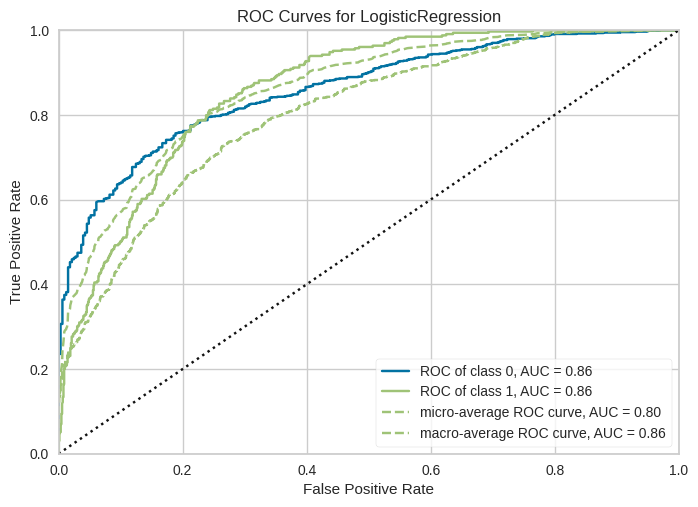

In [18]:
# Plot model characteristics such as the AUC curve, confusion matrix, feature importance, etc.

plot_model(tuned_lr, plot = 'auc')

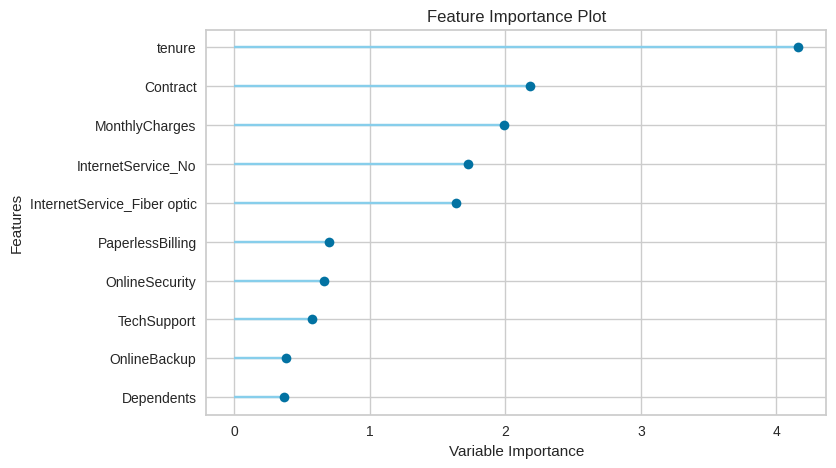

In [19]:
plot_model(tuned_lr, plot = 'feature')

In [20]:
# Finalize the model for prediction and deployment

final_lr = finalize_model(tuned_lr)

In [21]:
# Make predictions on new data.

predictions = predict_model(final_lr, data = df)  # assuming df is a new data

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7158,0.8424,0.7158,0.8085,0.7322,0.4180,0.4620


In [22]:
final_lr2 = finalize_model(tuned_lr2)

In [23]:
predictions2 = predict_model(final_lr2, data = df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7158,0.8424,0.7158,0.8085,0.7322,0.4180,0.4620


In [24]:
final_lr3 = finalize_model(tuned_lr3)

In [25]:
predictions3 = predict_model(final_lr3, data = df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6114,0.8328,0.6114,0.8123,0.6264,0.3049,0.3983


In [26]:
interpret_model(final_lr)

TypeError: ignored

> It is error because it uses SHAP tool to interpret the model. Thus, this function only supports tree based models for binary classification: lightgbm, xgboost, rf, et, catboost, dt.

In [27]:
save_model(final_lr, 'Final LR Model')  # .pkl export
loaded_lr = load_model('Final LR Model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
